In [77]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('E:\mining\HOC\KI II NAM 3\DE AN 2')

In [78]:
df = pd.read_excel('Bank_done.xlsx')
df.head(5)

,Age,Sex,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,Female,49,4,1.6,1,0,1,0,0,0,0
1,45,Male,34,3,1.5,1,0,1,0,0,0,0
2,39,Female,11,1,1.0,1,0,0,0,0,0,0
3,35,Female,100,1,2.7,2,0,0,0,0,0,0
4,35,Male,45,4,1.0,2,0,0,0,0,1,0


In [79]:
a = pd.get_dummies(df['Sex'])
df.drop(['Sex'], inplace=True, axis=1)
df = df.join(a)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Female,Male
0,25,49,4,1.6,1,0,1,0,0,0,0,1,0
1,45,34,3,1.5,1,0,1,0,0,0,0,0,1
2,39,11,1,1.0,1,0,0,0,0,0,0,1,0
3,35,100,1,2.7,2,0,0,0,0,0,0,1,0
4,35,45,4,1.0,2,0,0,0,0,1,0,0,1


In [80]:
data_X = df[['Age','Female','Male','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
data_Y = df[['Personal Loan']]

### Chia dữ liệu

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(
                                    data_X,data_Y, test_size= 0.3)

In [83]:
print('Số dòng dùng để đào tạo mô hình: ', len(x_train))
print('Số dòng dùng để thử nghiệm mô hình: ', len(x_test))

Số dòng dùng để đào tạo mô hình:  3500
Số dòng dùng để thử nghiệm mô hình:  1500


### Lựa chọn các biến mang lại giá trị thông tin 

In [84]:
from sklearn.feature_selection import mutual_info_classif
values = mutual_info_classif(x_train, y_train)

Text(0, 0.5, 'Mutual Information')

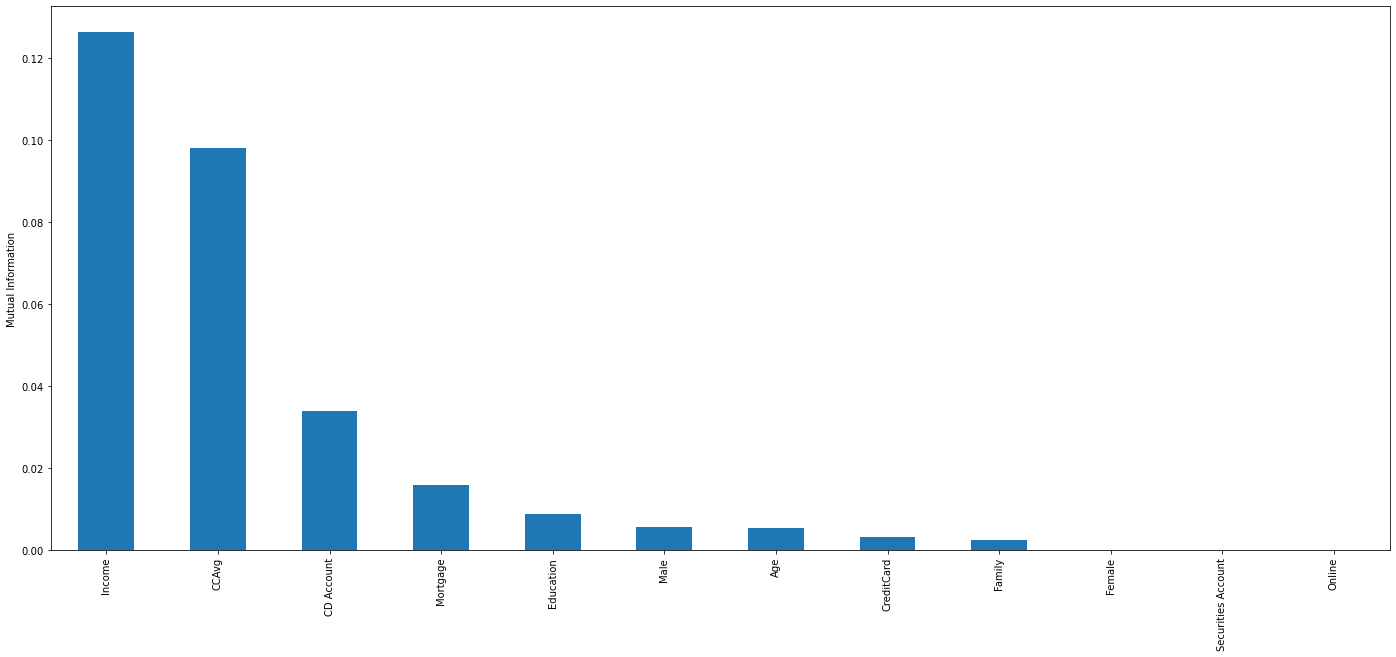

In [121]:
from sklearn.feature_selection import SelectKBest
values = pd.Series(values)
values.index = x_train.columns
values.sort_values(ascending=False).plot.bar(figsize=(24, 10))
plt.ylabel('Mutual Information')

- Có một số tính năng có giá trị thông tin lẫn nhau cao. Ngoài ra cũng có các tính năng có giá trị thông tin lẫn nhau thấp gần như bằng 0.
- Dựa vào đó ta chọn các tính năng: chọn k tính năng có chỉ sô giá trị thông tin lẫn nhau cao.

In [86]:
y_train_1 = y_train[y_train['Personal Loan'] == 1]

In [87]:
y_train_0 = y_train[y_train['Personal Loan'] == 0]

- Ở đây chúng ta có thể thấy dữ liệu bị mất cân bằng. Nhãn '0' nhiều hơn nhãn '1'. Vì vậy chúng ta cần CÂN BẰNG DỮ LIỆU để mô hình được đào tạo tốt hơn


In [88]:
print("Trước khi cân bằng dữ liệu, số dòng thuộc nhãn '1':", len(y_train_1))
print("Trước khi cân bằng dữ liệu, số dòng thuộc nhãn '0':", len(y_train_0)) 

Trước khi cân bằng dữ liệu, số dòng thuộc nhãn '1': 331
Trước khi cân bằng dữ liệu, số dòng thuộc nhãn '0': 3169


### Cân bằng dữ liệu

In [122]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [123]:
# pip install imblearn

In [124]:
y_train_res_1 = y_train_res[y_train_res['Personal Loan'] == 1]
y_train_res_0 = y_train_res[y_train_res['Personal Loan'] == 0]

In [125]:
print("Sau khi cân bằng dữ liệu, số dòng thuộc nhãn '1':", len(y_train_res_1 == 1))
print("Sau khi cân bằng dữ liệu, số dòng thuộc nhãn '0':", len(y_train_res_0 == 0))

Sau khi cân bằng dữ liệu, số dòng thuộc nhãn '1': 3169
Sau khi cân bằng dữ liệu, số dòng thuộc nhãn '0': 3169


In [93]:
print('Lượng dữ liệu ban đầu: ', len(x_train))
print('Lượng dữ liệu sau khi đã cân bằng', len(x_train_res))

Lượng dữ liệu ban đầu:  3500
Lượng dữ liệu sau khi đã cân bằng 6338


### Chuẩn hóa dữ liệu 

In [94]:
from sklearn.preprocessing import StandardScaler

### Hồi quy Log

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)

In [97]:
y_test = y_test['Personal Loan'].values

In [126]:
#dự đoán 20 người bất kì 
DD = pd.DataFrame({'True values ':y_test ,'y_pred':predictions})
DD.sample(10)

,True values,y_pred
1415,0,0
1402,0,0
142,0,0
609,0,1
1434,0,0
909,1,0
693,0,1
358,0,0
1341,0,1
1268,0,1


In [99]:
def predict(x_input):
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(x_train_res, y_train_res)
    y_pred = classifier.predict(x_test)
    return y_pred

* Hướng dẫn nhập dự đoán: 
- Thu nhập hằng tháng tính bằng đô
- Trình độ học vấn : khoảng từ 1 đến 3 tương ứng là Dưới Đại học, Cao học và Sau đại học 
- CCAvg : trung bình chi tiêu 1 tháng tính bằng ('$')
- mortgage rate: Trị giá khi nhà được chủ sở hữu mang đi cầm 
- KH có sử dụng tài khoản chứng khoán : có nhập 1 ngược lại nhập 0 
- KH có chứng chỉ tài khoản tiền gửi (CD) với ngân hàng: có nhập 1 ngược lại nhập 0 
- KH có sử dụng thẻ tín dụng do ngân hàng phát hành: có nhập 1 ngược lại nhập 0 
- KH có sử dụng các tiện ích trực tuyến của ngân hàng: có nhập 1 ngược lại nhập 0 


In [100]:
def main():
    age                 = int(input("Độ tuổi của bạn : "))
    income              = float(input("Thu nhập của bạn: "))
    sex_female          = int(input("Nhập 1 nếu bạn là nữ, 0 nếu là nam: "))
    sex_male            = int(input("Nhập 1 nếu bạn là nam, 0 nếu là nữ: "))
    family              = int(input("Số người trong gia đình bạn: "))
    education           = int(input("Trình độ học vấn của bạn : "))
    ccavg               = float(input("Trung bình chi tiêu bằng thẻ tín dụng mỗi tháng: "))
    mortgage            = int(input("Giá trị thuế chấp của căn nhà nếu có: "))
    securities_account  = int(input("Bạn có sử dụng tài khoản tại ngân hàng:"))
    CD_account          = int(input("Bạn có tài khoản tiền gửi ngân hàng: "))
    credit_card         = int(input("Bạn có sử dụng thẻ tín dụng do ngân hàng phát hành: "))
    online              = int(input("Bạn có sử dụng các tiện ích trực tuyến của ngân hàng: "))
    x_input = [[age, sex_female, sex_male, income, family, ccavg, mortgage, 
                education,securities_account, CD_account, credit_card, online]]
                               
    result = predict(x_input)    
    print('Kết quả nhận được là:',result[0])
    

In [52]:
print('Bạn đang nhập các chỉ số! ')
if __name__ == "__main__":
    main()

Bạn đang nhập các chỉ số! 
Độ tuổi của bạn : 40
Thu nhập của bạn: 60
Nhập 1 nếu bạn là nữ, 0 nếu là nam: 0
Nhập 1 nếu bạn là nam, 0 nếu là nữ: 1
Số người trong gia đình bạn: 4
Trình độ học vấn của bạn : 3
Trung bình chi tiêu bằng thẻ tín dụng mỗi tháng: 4.0
Giá trị thuế chấp của căn nhà nếu có: 200
Bạn có sử dụng tài khoản tại ngân hàng:1
Bạn có tài khoản tiền gửi ngân hàng: 1
Bạn có sử dụng thẻ tín dụng do ngân hàng phát hành: 1
Bạn có sử dụng các tiện ích trực tuyến của ngân hàng: 1
Kết quả nhận được là: 0


In [101]:
from sklearn import metrics

### Các chỉ số đánh giá mô hình: 

a. Độ chính xác

In [102]:
print("Độ chính xác của mô hình: {:.2f} %"
      .format(metrics.accuracy_score(y_test, y_pred)*100))

Độ chính xác của mô hình: 90.00 %


b. Confusion_matrix

In [103]:
from sklearn.metrics import (confusion_matrix, recall_score, 
                            precision_score , f1_score , 
                            accuracy_score, roc_auc_score)

[[1233  118]
 [  32  117]]


<AxesSubplot:>

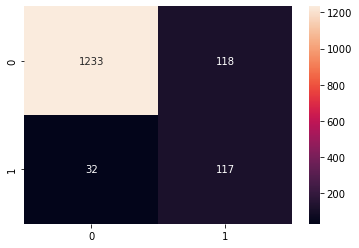

In [104]:
ccb = confusion_matrix(y_test, y_pred)
print(ccb)
sns.heatmap(confusion_matrix(y_test,y_pred)
            ,annot=True,fmt='')

c. Các chỉ số đánh giá hiệu suất mô hình khác:

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1351
           1       0.50      0.79      0.61       149

    accuracy                           0.90      1500
   macro avg       0.74      0.85      0.78      1500
weighted avg       0.93      0.90      0.91      1500



d. Đường cong ROC 

In [106]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = classifier.predict_proba(x_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds)

In [107]:
print("Roc Auc Score: ", roc_auc_score(y_test,preds))

Roc Auc Score:  0.9374214476972065


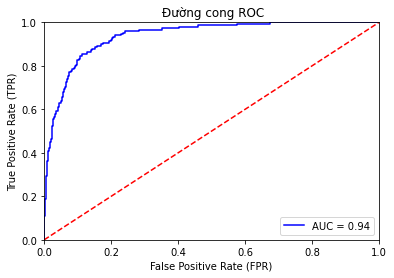

In [112]:
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title(' Đường cong ROC')
plt.legend(loc = 'lower right')
plt.show()

e. Chỉ số hồi quy 

In [113]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.1
Root Mean Squared Error:  0.31622776601683794


### Xây dựng các mô hình khác: 

1. SVM 
- a. Xây dựng mô hình

In [115]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'linear', random_state = 0)
SVMclassifier.fit(x_train_res, y_train_res)
y_pred_2 = SVMclassifier.predict(x_test)

- b . Độ chính xác

In [116]:
print("Độ chính xác của mô hình: {:.2f} %"
      .format(metrics.accuracy_score(y_test, y_pred_2)*100))

Độ chính xác của mô hình: 90.00 %


- c. Ma trận nhầm lẫn

[[1263  102]
 [  23  112]]


<AxesSubplot:>

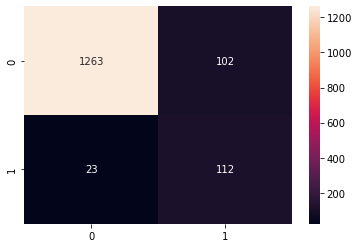

In [71]:
model_2= confusion_matrix(y_test, y_pred_2)
print(model_2)
sns.heatmap(confusion_matrix(y_test,y_pred_2)
            ,annot=True,fmt='')

2. DecisionTree: 

In [73]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')
decision_tree.fit(x_train_res,y_train_res)

DecisionTreeClassifier()

In [131]:
y_pred_3 = decision_tree.predict(x_test)
print("Độ chính xác của mô hình: {:.2f} %"
      .format(metrics.accuracy_score(y_test, y_pred_3)*100))

Độ chính xác của mô hình: 99.07 %


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1351
           1       0.93      0.98      0.95       149

    accuracy                           0.99      1500
   macro avg       0.96      0.99      0.97      1500
weighted avg       0.99      0.99      0.99      1500

Ma trận nhầm lẫn 
[[1340   11]
 [   3  146]]


<AxesSubplot:>

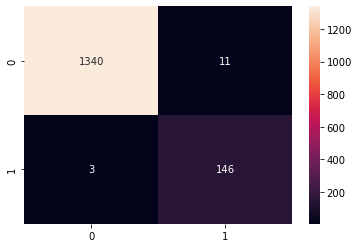

In [132]:
print(classification_report(y_test,y_pred_3))
print("Ma trận nhầm lẫn ")
model_3= confusion_matrix(y_test, y_pred_3)
print(model_3)
sns.heatmap(confusion_matrix(y_test,y_pred_3)
            ,annot=True,fmt='')

3. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators=500, max_depth=8)
RFClassifier.fit(x_train_res,y_train_res)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [135]:
y_pred_4 = RFClassifier.predict(x_test)
print("Độ chính xác của mô hình: {:.2f} %"
      .format(metrics.accuracy_score(y_test, y_pred_4)*100))

Độ chính xác của mô hình: 98.33 %


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1351
           1       0.86      0.99      0.92       149

    accuracy                           0.98      1500
   macro avg       0.93      0.98      0.96      1500
weighted avg       0.99      0.98      0.98      1500

Ma trận nhầm lẫn 
[[1328   23]
 [   2  147]]


<AxesSubplot:>

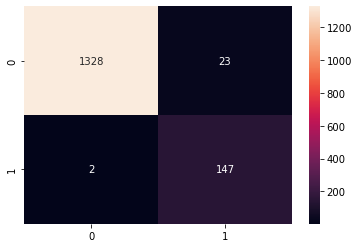

In [134]:
print(classification_report(y_test,y_pred_4))
print("Ma trận nhầm lẫn ")
model_4= confusion_matrix(y_test, y_pred_4)
print(model_4)
sns.heatmap(confusion_matrix(y_test,y_pred_4)
            ,annot=True,fmt='')

4. Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train_res,y_train_res)

GaussianNB()

In [136]:
y_pred_5 = GaussianNB_model.predict(x_test)
print("Độ chính xác của mô hình: {:.2f} %"
      .format(metrics.accuracy_score(y_test, y_pred_5)*100))

Độ chính xác của mô hình: 86.13 %


              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1351
           1       0.39      0.72      0.51       149

    accuracy                           0.86      1500
   macro avg       0.68      0.80      0.71      1500
weighted avg       0.91      0.86      0.88      1500

Ma trận nhầm lẫn 
[[1184  167]
 [  41  108]]


<AxesSubplot:>

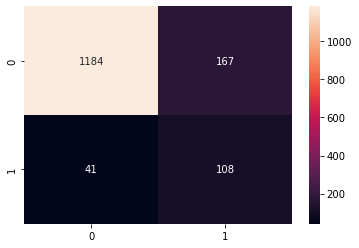

In [137]:
print(classification_report(y_test,y_pred_5))
print("Ma trận nhầm lẫn ")
model_5= confusion_matrix(y_test, y_pred_5)
print(model_5)
sns.heatmap(confusion_matrix(y_test,y_pred_5)
            ,annot=True,fmt='')